In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data= pd.read_csv('gas_prices.csv')
data.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


In [3]:
data.isnull().sum()

Year           0
Australia      1
Canada         0
France         0
Germany        0
Italy          0
Japan          0
Mexico         0
South Korea    0
UK             0
USA            0
dtype: int64

In [4]:
# removing na value
data= data.dropna()
data.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11
5,1995,1.95,1.53,4.26,3.96,4.00,4.43,1.11,2.94,3.21,1.15


In [5]:
print(data.shape)
print(len(data))

(18, 11)
18


## STEP 1: STANDARDIZATION

In [6]:
# calculate mean in column wise
data= np.array(data)
mean_ = data.mean(axis=0)
print(np.array(mean_))

variance = data.var(axis=0)
print(variance)


data_standardized=[]
for x in data:
    z= (x-mean_)/variance**0.5
    data_standardized.append(z)


[1.99950000e+03 2.34888889e+00 2.09888889e+00 4.45111111e+00
 4.31222222e+00 4.64888889e+00 3.85722222e+00 1.82500000e+00
 3.93500000e+00 4.48000000e+00 1.61611111e+00]
[26.91666667  0.67584321  0.61600988  1.32764321  1.88733951  1.3145321
  0.45968673  0.17775833  1.31648056  1.97248889  0.42909043]


In [7]:
data_standardized

[array([-1.63835604, -0.47304511, -0.22792372, -0.86884357, -1.02796428,
        -0.12986039, -0.58587175, -1.24521493, -1.25939111, -1.04667066,
        -0.72683177]),
 array([-1.44560827, -0.55819323, -0.4700042 , -0.77337685, -0.75863926,
        -0.10369449, -0.40888112, -0.77084734, -1.11994296, -1.01106962,
        -0.74209778]),
 array([-1.2528605 , -0.7528175 , -0.67386144, -0.90355874, -0.90422035,
        -0.84506162,  0.44657357, -0.62853706, -0.91948624, -1.16771421,
        -0.7726298 ]),
 array([-1.06011273, -0.61901332, -0.82675437, -0.74734048, -0.57666289,
        -0.82761769,  0.74155794, -0.8182841 , -0.92820175, -1.06091108,
        -0.7726298 ]),
 array([-0.86736496, -0.48520913, -0.72482575, -0.16586137, -0.25638448,
        -0.5659587 ,  0.84480247, -1.69586414, -0.86719319, -0.90426649,
        -0.71156576]),
 array([-0.67461719, -0.27842084, -0.62289713, -0.03567948, -0.27094259,
        -0.22580202, -0.32038581, -1.36380683, -0.65802096, -0.81170378,
        -

### STEP 2: COVARIANCE MATRIX COMPUTATION

In [8]:
df_mat = np.stack((data_standardized), axis = 1)  
cov_mat= np.cov(df_mat)
cov_mat.shape
print(cov_mat)

[[1.05882353 0.8066759  0.82602036 0.83847538 0.88968073 0.74237145
  0.42684992 0.95399887 0.99751177 0.99854524 0.90758497]
 [0.8066759  1.05882353 1.04281266 1.03791214 1.03354904 1.04069482
  0.83649737 0.68954075 0.93677883 0.95903629 1.03332434]
 [0.82602036 1.04281266 1.05882353 1.00549267 1.01014829 1.02879501
  0.79384929 0.7722396  0.95511749 0.97496383 1.04514891]
 [0.83847538 1.03791214 1.00549267 1.05882353 1.04526925 1.01880865
  0.81290631 0.65794723 0.93228201 0.96820841 1.01327039]
 [0.88968073 1.03354904 1.01014829 1.04526925 1.05882353 1.0080178
  0.80851271 0.73684888 0.96250692 0.98725457 1.02713165]
 [0.74237145 1.04069482 1.02879501 1.01880865 1.0080178  1.05882353
  0.79301435 0.62956901 0.87439852 0.92253942 0.99806792]
 [0.42684992 0.83649737 0.79384929 0.81290631 0.80851271 0.79301435
  1.05882353 0.35492065 0.59873013 0.59218759 0.77819945]
 [0.95399887 0.68954075 0.7722396  0.65794723 0.73684888 0.62956901
  0.35492065 1.05882353 0.92011899 0.89489411 0.837

## STEP 4: FEATURE VECTOR

In [9]:
from numpy import linalg 

eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
print(eigenvalues)

print(eigenvectors)


[1.00142298e+01 1.12617099e+00 2.68484158e-01 1.51821465e-01
 4.65672987e-02 1.67194995e-02 1.08632027e-02 6.53201014e-03
 6.60025926e-04 2.13734438e-03 2.87301670e-03]
[[ 0.28556051 -0.42070946  0.01793888  0.49267313  0.27038023  0.05636303
   0.29308449 -0.44210336  0.12256033  0.34818234 -0.06724584]
 [ 0.31705046  0.18932869 -0.14312995 -0.1253612  -0.11358905  0.22056624
   0.20508645 -0.21414258  0.27162771 -0.18851364  0.75408461]
 [ 0.31803705  0.10532964 -0.05174386 -0.4432189  -0.12024172 -0.06310482
   0.28026321 -0.16167451  0.47852227 -0.11944112 -0.56768084]
 [ 0.31460765  0.17208694 -0.24778651  0.29214147  0.09732349 -0.11532094
   0.17372032  0.75349726  0.23132785  0.22416563  0.01388732]
 [ 0.31965338  0.10140288 -0.09429374  0.27501664  0.355565    0.38078598
  -0.27694486  0.00658577 -0.11280998 -0.62455175 -0.22815886]
 [ 0.30655745  0.23245378 -0.35133975 -0.33961264  0.26729231  0.06424955
  -0.42795724 -0.17720796 -0.22437987  0.52212003 -0.0115115 ]
 [ 0.2358

### STEP 5. Sort eigenvalues and their corresponding eigenvectors.

In [22]:
# sorting 
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

### STEP 6. Pick k eigenvalues and form a matrix of eigenvectors.



In [11]:
# let k=3
top_3_eigenvectors=eigenvectors[:3]
top_3_eigenvectors

array([[ 0.28556051, -0.42070946,  0.01793888,  0.49267313,  0.27038023,
         0.05636303,  0.29308449, -0.44210336, -0.06724584,  0.34818234,
         0.12256033],
       [ 0.31705046,  0.18932869, -0.14312995, -0.1253612 , -0.11358905,
         0.22056624,  0.20508645, -0.21414258,  0.75408461, -0.18851364,
         0.27162771],
       [ 0.31803705,  0.10532964, -0.05174386, -0.4432189 , -0.12024172,
        -0.06310482,  0.28026321, -0.16167451, -0.56768084, -0.11944112,
         0.47852227]])

### STEP 7. Transform the original matrix

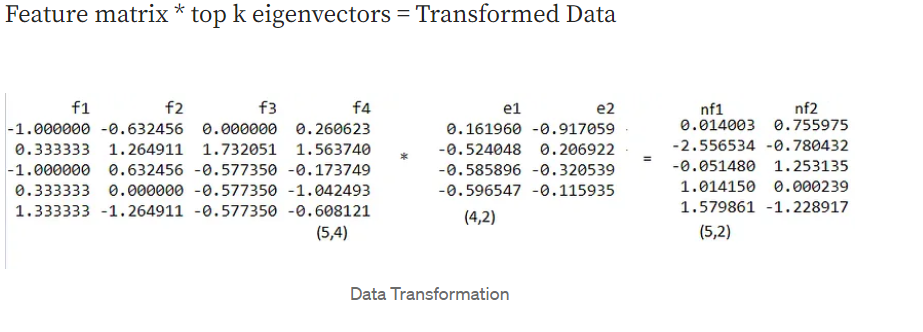

In [14]:
# Transformed Data = data_standardized * top k eigenvectors  

Transformed_Data =  np.dot(data_standardized,top_3_eigenvectors.T)
Transformed_Data

array([[-0.97626074, -1.18264212,  0.48706071],
       [-0.92510974, -1.11077842,  0.35776266],
       [-0.82108848, -0.87063682,  0.63814873],
       [-0.45045375, -0.74082849,  0.71727019],
       [ 0.41410996, -0.47837171,  0.62134047],
       [ 0.00818349, -0.46895239,  0.17013159],
       [-0.4553125 , -0.59614019,  0.0707377 ],
       [-0.46348582, -1.0441661 , -0.01152493],
       [-0.52963026, -0.4885499 , -0.19313111],
       [-0.55298245, -0.10004432,  0.00447118],
       [-0.98690835, -0.51697506,  0.15207642],
       [-0.95938884, -0.48999677, -0.03366595],
       [-0.07637758,  0.01064142, -0.14437821],
       [ 0.60841529,  0.55927701, -0.25033992],
       [ 0.80725546,  1.2782765 , -0.4374976 ],
       [ 1.08340678,  1.83656265, -0.66856662],
       [ 1.62092532,  2.01612831, -1.05713251],
       [ 2.65470219,  2.38719641, -0.42276281]])

## Method 2    Library use

In [15]:
gas = pd.read_csv('gas_prices.csv')

In [16]:
gas= gas.dropna()

In [17]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(gas)
Scaled_data=scaling.transform(gas)

In [19]:
from sklearn.decomposition import PCA
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
print(x)

[[-2.74521139e+00 -1.10244829e+00  5.37742370e-01]
 [-2.45716292e+00 -8.41781821e-01  2.11074944e-01]
 [-2.60216750e+00 -8.83784837e-01 -8.52907843e-01]
 [-2.34225200e+00 -1.12164836e+00 -8.71721073e-01]
 [-1.95930452e+00 -1.74164739e+00 -2.12818024e-01]
 [-1.72180098e+00 -9.17017692e-01  6.45382729e-01]
 [-1.82795629e+00  2.45600820e-02  6.15908512e-01]
 [-2.42790418e+00  6.80074182e-01  9.05659332e-01]
 [-1.60979896e+00  8.94707843e-01  1.05873348e-01]
 [-7.63760531e-01  9.72739000e-01 -5.39414498e-01]
 [-1.25442299e+00  1.61580843e+00 -5.68230651e-01]
 [-1.09243390e+00  1.79023867e+00 -3.81027873e-01]
 [ 1.72206781e-01  1.00811437e+00  9.78611233e-02]
 [ 1.71315162e+00  4.21226172e-01  2.12383881e-01]
 [ 3.26707338e+00  2.72094307e-01 -3.22486836e-03]
 [ 4.41338088e+00  2.01193914e-01 -7.96191578e-03]
 [ 5.70106212e+00  1.26705673e-01  4.07132004e-01]
 [ 7.53730137e+00 -1.39913426e+00 -3.01711497e-01]]
